In [166]:
##Predict if patients are susceptible in going through Light sleep

In [167]:
# import file

import csv

file_path = "datasets\\data2.csv"

with open(file_path, 'r') as csv_file:
    reader = csv.reader(csv_file)

In [168]:
# import packages

import datetime
import os
import collections

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from mlxtend.plotting import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, f1_score, precision_recall_curve,
                             precision_score, recall_score, roc_auc_score,
                             roc_curve, mean_squared_error, r2_score)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import (cross_validate, train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [169]:
dataset_file = file_path
df = pd.read_csv(dataset_file)
df.shape

(452, 13)

In [170]:
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,0,65,1,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,1,69,0,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,2,40,1,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,3,40,1,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,4,57,0,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,447,27,1,7.5,0.91,22,57,21,0.0,0.0,0.0,0,5.0
448,448,52,0,6.0,0.74,28,57,15,4.0,25.0,0.0,0,3.0
449,449,40,1,8.5,0.55,20,32,48,1.0,0.0,3.0,1,0.0
450,450,45,0,7.0,0.76,18,72,10,3.0,0.0,0.0,0,3.0


In [171]:
# features extracted for the models

X_df = df.drop(['Unnamed: 0', 'Age', 'Gender', 'REM sleep percentage', 'Deep sleep percentage'], axis = 1)
y_df = df['Light sleep percentage']

In [172]:
# splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 50)

In [173]:
X_train.shape, X_test.shape

((361, 8), (91, 8))

In [174]:
Counter(y_train), Counter(y_test)

(Counter({20: 45,
          15: 41,
          17: 39,
          18: 33,
          10: 25,
          12: 23,
          13: 22,
          45: 16,
          21: 14,
          47: 14,
          52: 11,
          19: 10,
          53: 10,
          16: 9,
          48: 8,
          55: 8,
          54: 7,
          50: 5,
          14: 3,
          22: 3,
          7: 3,
          51: 3,
          56: 2,
          11: 2,
          30: 1,
          40: 1,
          63: 1,
          46: 1,
          62: 1}),
 Counter({18: 12,
          13: 10,
          10: 9,
          15: 8,
          20: 7,
          17: 7,
          52: 5,
          55: 5,
          12: 5,
          45: 4,
          21: 3,
          16: 3,
          53: 3,
          47: 2,
          50: 2,
          48: 2,
          54: 1,
          22: 1,
          19: 1,
          56: 1}))

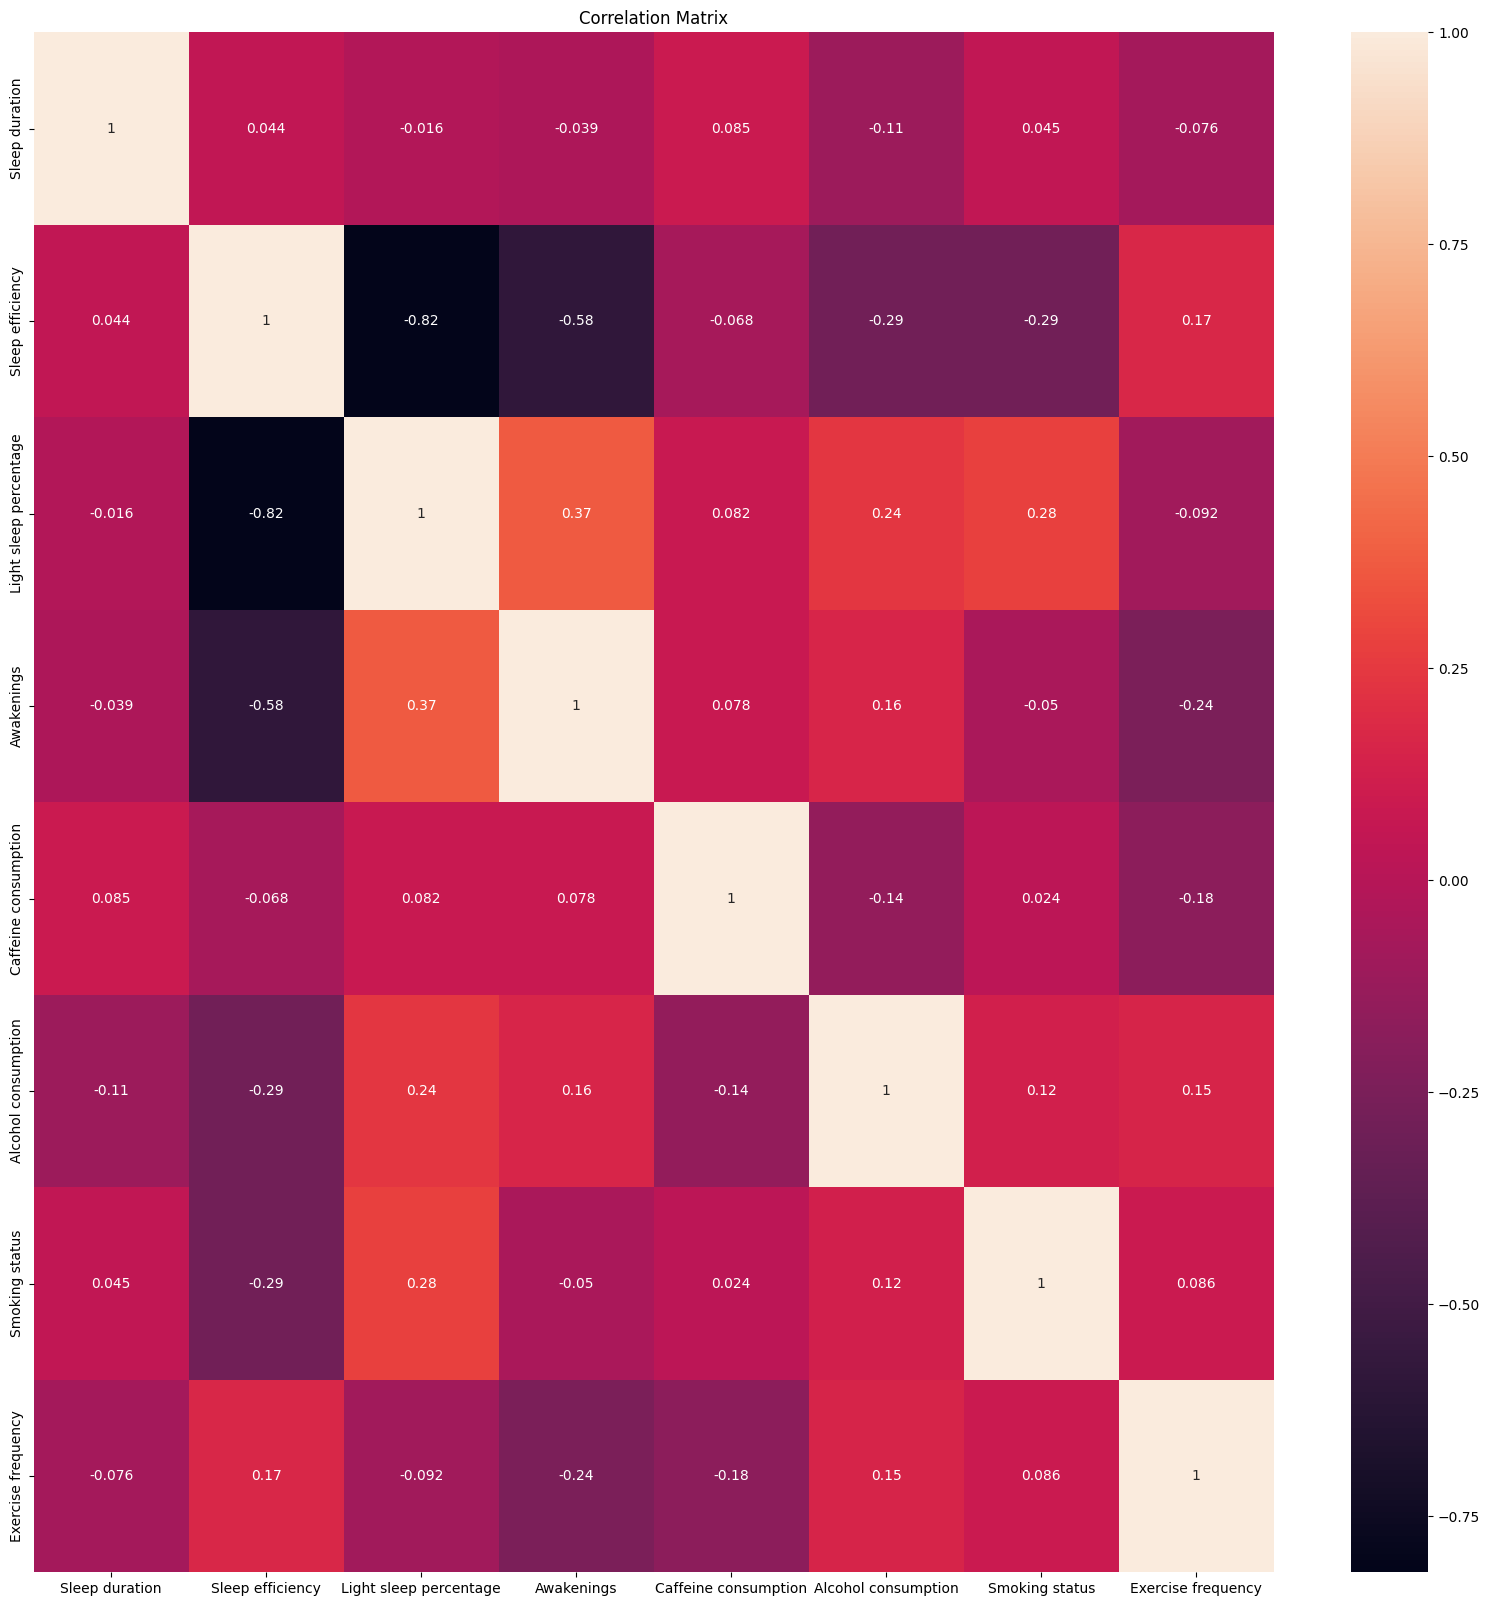

In [175]:
# performing a correlation matrix

corr_matrix = X_test.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [176]:
# support vector machine

svm_classifier = SVC(random_state = 50)
svm_classifier.fit(X_train, y_train)

SVC(random_state=50)

In [177]:
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 30.77%


In [178]:
print("SVM Classification Report")
print(classification_report(y_test, y_pred))

SVM Classification Report
              precision    recall  f1-score   support

          10       0.46      0.67      0.55         9
          12       0.00      0.00      0.00         5
          13       0.31      0.50      0.38        10
          15       0.18      0.25      0.21         8
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         7
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         1
          20       0.24      0.86      0.38         7
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         1
          45       0.27      1.00      0.42         4
          47       0.00      0.00      0.00         2
          48       0.00      0.00      0.00         2
          50       0.00      0.00      0.00         2
          52       0.50      1.00      0.67         5
          53       0.00      0.00      0.00         3
 

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

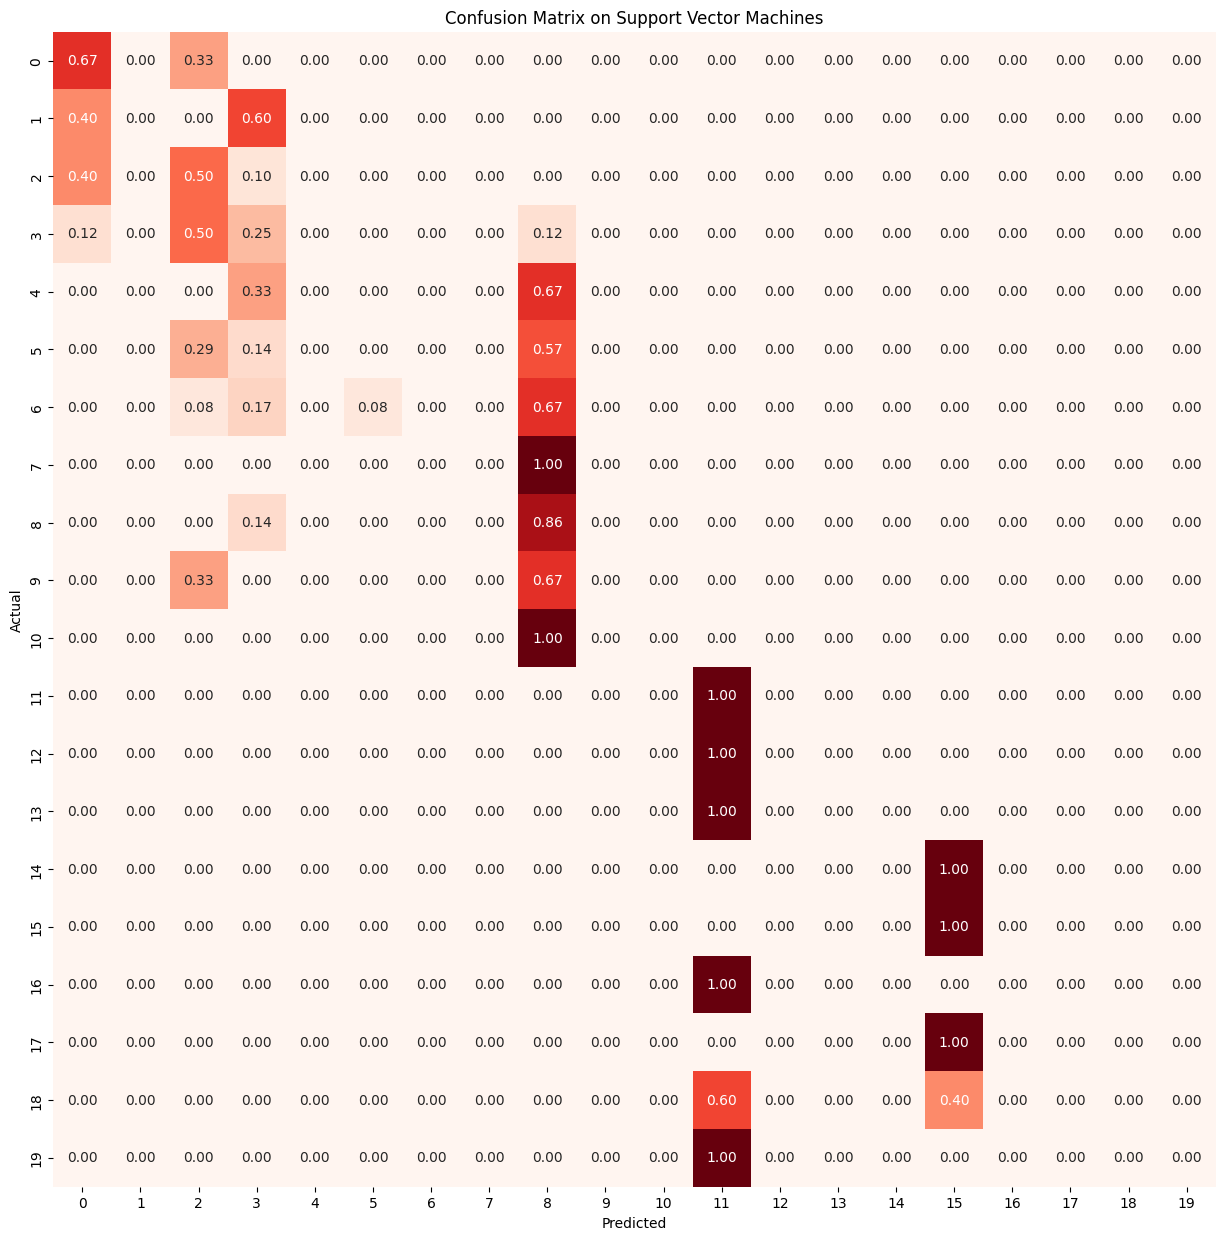

In [179]:
# confusion matrix on Support Vector Machine

def plot_confusion_matrix(cm, show_absolute = True, show_normed = False, cmap = 'Reds'):
    plt.figure(figsize = (15, 15))

    if show_normed:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    sns.heatmap(cm, annot = True, fmt = '.2f' if show_normed else 'd', cmap = cmap, cbar = False)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix on Support Vector Machine')

    plt.show()

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, show_absolute = True, show_normed = True, cmap = 'Reds')

In [180]:
# stacking ensemble model

base_models = [
    ('lr', LogisticRegression(random_state = 50)),
    ('gb', GradientBoostingClassifier(random_state = 50))
]

meta_model = RandomForestClassifier()

stacking_classifier = StackingClassifier(estimators = base_models, final_estimator = meta_model)

stacking_classifier.fit(X_train, y_train)

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\

StackingClassifier(estimators=[('lr', LogisticRegression(random_state=50)),
                               ('gb',
                                GradientBoostingClassifier(random_state=50))],
                   final_estimator=RandomForestClassifier())

In [181]:
y_pred = stacking_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 97.80%


In [182]:
print("Stacking Ensemble Classification Report")
print(classification_report(y_test, y_pred))

Stacking Ensemble Classification Report
              precision    recall  f1-score   support

          10       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       0.91      1.00      0.95        10
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         7
          18       1.00      1.00      1.00        12
          19       0.00      0.00      0.00         1
          20       1.00      1.00      1.00         7
          21       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         1
          45       1.00      1.00      1.00         4
          47       1.00      1.00      1.00         2
          48       1.00      1.00      1.00         2
          50       1.00      1.00      1.00         2
          52       1.00      1.00      1.00         5
          53       1.00      1.00      1.

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

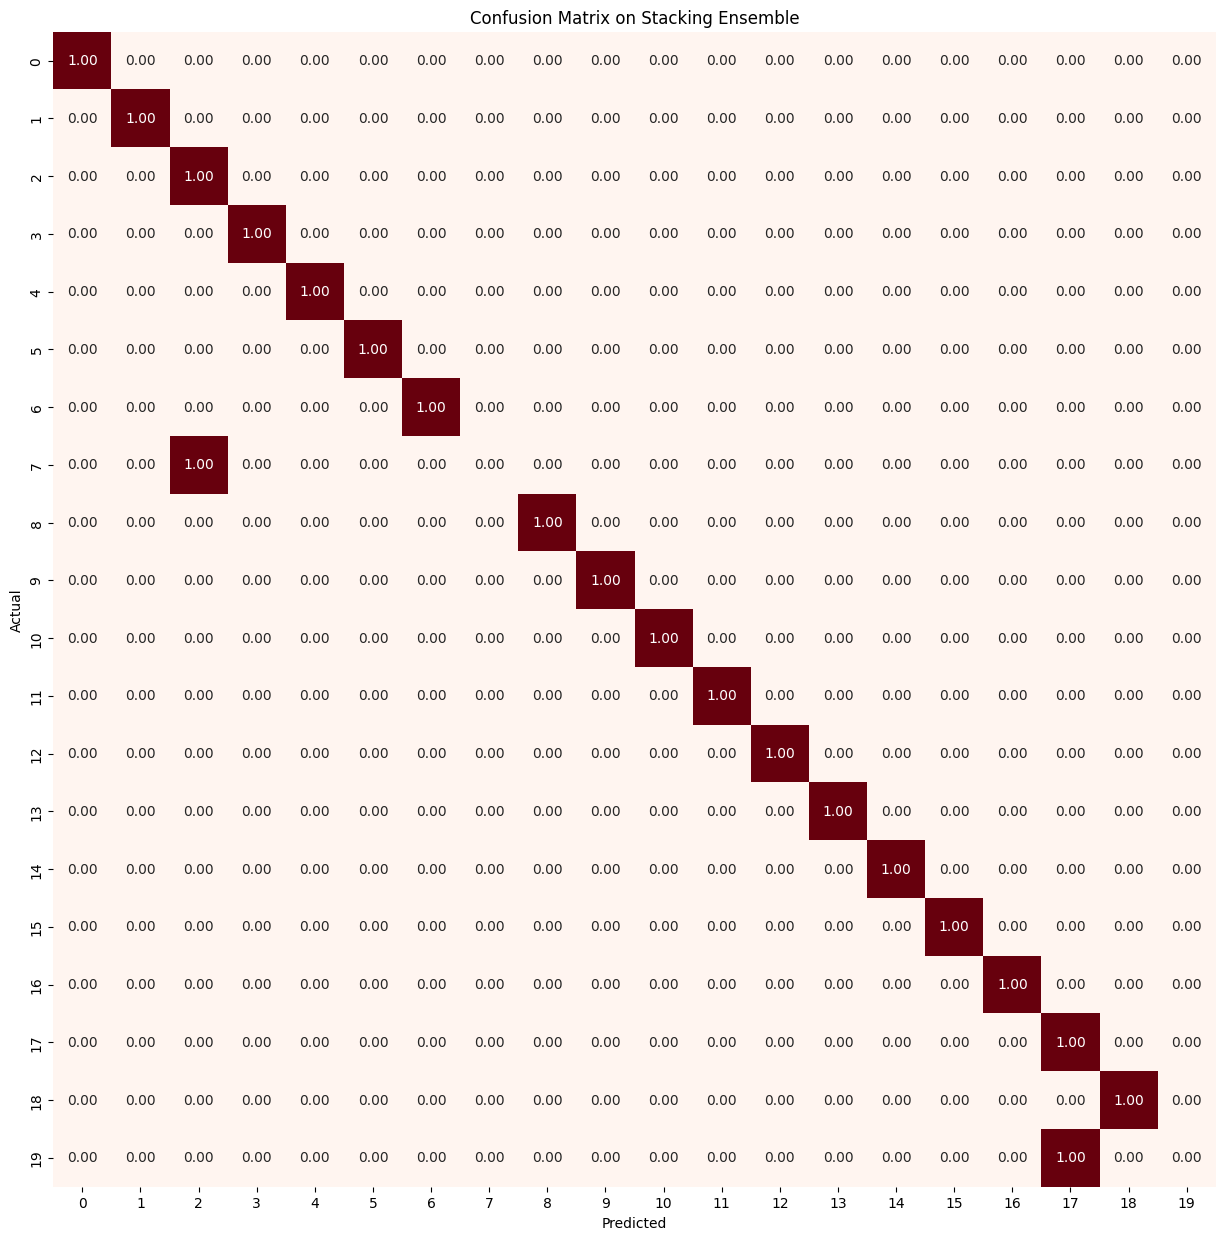

In [183]:
# confusion matrix on stacking

def plot_confusion_matrix(cm, show_absolute = True, show_normed = False, cmap = 'Reds'):
    plt.figure(figsize = (15, 15))

    if show_normed:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    sns.heatmap(cm, annot = True, fmt = '.2f' if show_normed else 'd', cmap = cmap, cbar = False)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix on Stacking Ensemble')

    plt.show()

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, show_absolute = True, show_normed = True, cmap = 'Reds')

In [184]:
# random forest model

rfc = RandomForestClassifier(random_state = 50)

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

In [185]:
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 75.82%


In [186]:
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred))

Random Forest Classification Report
              precision    recall  f1-score   support

           7       0.00      0.00      0.00         0
          10       1.00      0.67      0.80         9
          12       0.60      0.60      0.60         5
          13       0.78      0.70      0.74        10
          15       0.67      1.00      0.80         8
          16       0.00      0.00      0.00         3
          17       0.75      0.86      0.80         7
          18       0.92      1.00      0.96        12
          19       0.00      0.00      0.00         1
          20       0.67      0.86      0.75         7
          21       1.00      0.33      0.50         3
          22       1.00      1.00      1.00         1
          45       1.00      1.00      1.00         4
          47       0.50      1.00      0.67         2
          48       0.50      0.50      0.50         2
          50       0.00      0.00      0.00         2
          52       0.83      1.00      0.91  

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: Undefi

C:\Users\adity\AppData\Local\Temp\ipykernel_19692\1735729376.py:7: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]


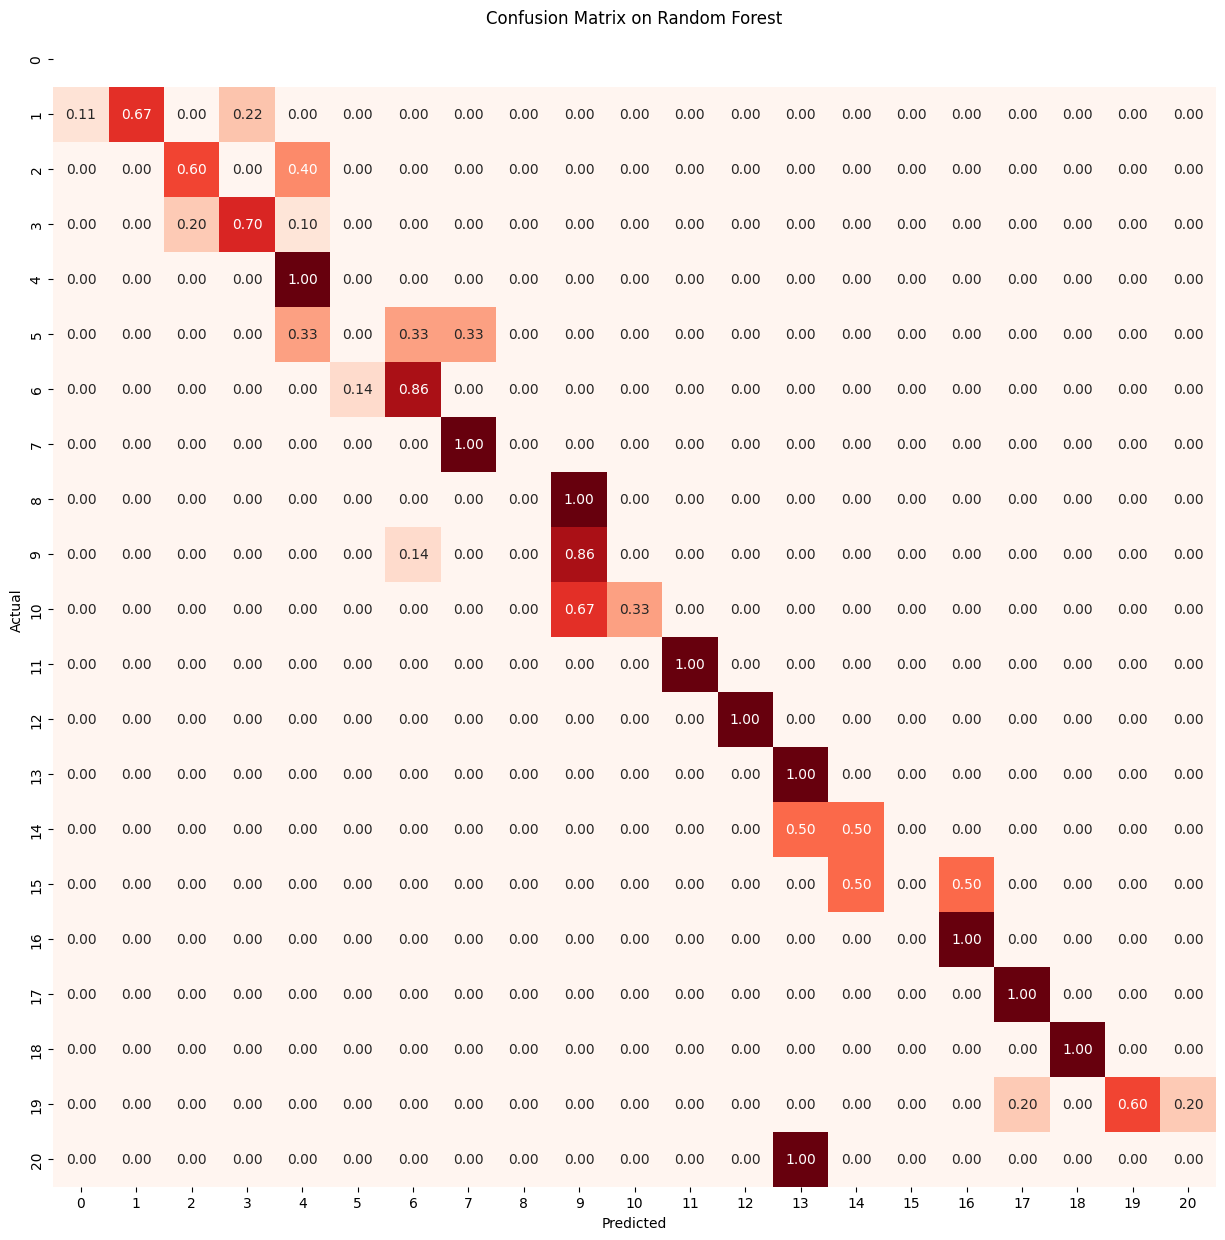

In [187]:
# confusion matrix on Random Forest

def plot_confusion_matrix(cm, show_absolute = True, show_normed = False, cmap = 'Reds'):
    plt.figure(figsize = (15, 15))

    if show_normed:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    sns.heatmap(cm, annot = True, fmt = '.2f' if show_normed else 'd', cmap = cmap, cbar = False)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix on Random Forest')

    plt.show()

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, show_absolute = True, show_normed = True, cmap = 'Reds')

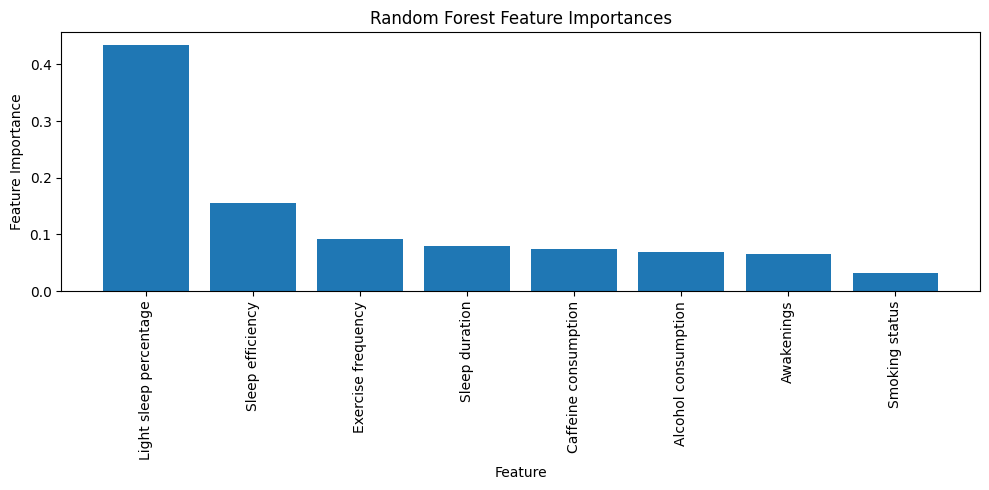

In [188]:
# feature importance for random forest

feature_importances = rfc.feature_importances_

feature_names = X_df.columns

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 5))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()